In [1]:
%pip install opencv-python shapely

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


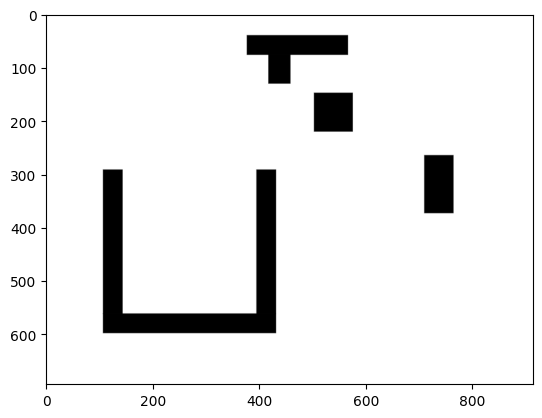

In [2]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("./obstacle/u_shape.png"))

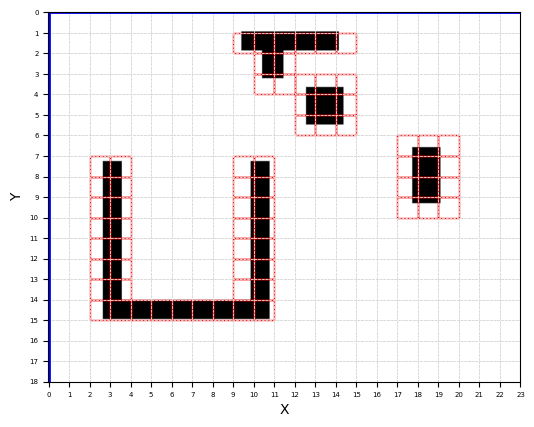

In [3]:
# Import necessary custom-built classes and methods
# from utils.obstacle_space import Map
from obstacle.obstacle_map import Map
from a_star.explorer import Explorer
from a_star.search import astar_search, path_states, dynamic_weighted_astar_search
import time

map = Map(image_path="./obstacle/u_shape.png", grid_size=40)
map.draw_coordinate_system()

In [4]:
initial=(0,0)
goal=(22,17)

# Initialize the explorer class
explorer = Explorer(map=map, initial=initial, goal=goal)
# Check validity of start and goal nodes

if map.is_obstacle_in_grid(initial[0], initial[1]):
    print('Start lie in obstacle space!!\nPlease try again')

if map.is_obstacle_in_grid(goal[0], goal[1]):
    print('Goal lie in obstacle space!!\nPlease try again')

Reached: 112
Elapsed Time: 0.004490852355957031 seconds
path length = 23


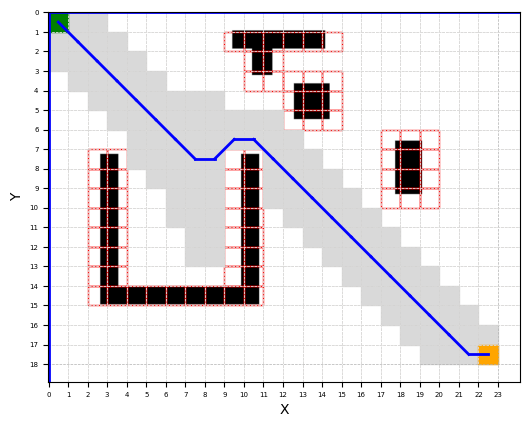

In [5]:
start_time = time.time()
node = astar_search(explorer)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Reached: {len(explorer.reached.keys())}")
print(f"Elapsed Time: {elapsed_time} seconds")

states = path_states(node)
print('path length =', len(states))
explorer.get_reached()
map.draw_path_found(states, initial, goal, explorer.get_reached())

Elapsed Time: 0.0049800872802734375 seconds
path length = 23


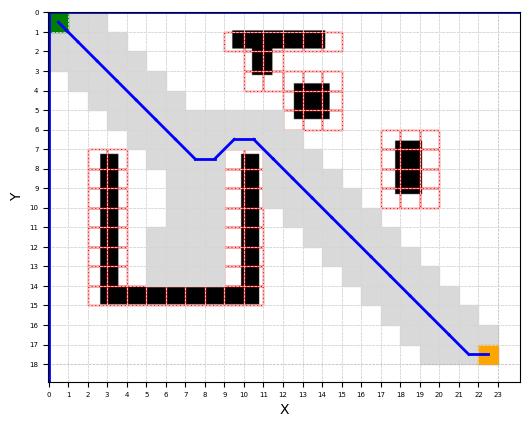

In [6]:
from math import sqrt
def h(node):
    h1 = abs(goal[0] - node.state[0])
    h2 = abs(goal[1] - node.state[1])
    return h1 + h2 + (sqrt(2) - 2) * min(h1, h2)

start_time = time.time()
node = dynamic_weighted_astar_search(explorer, h=h)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time} seconds")


path = path_states(node)
print('path length =', len(states))
map.draw_path_found(path, initial, goal, explorer.get_reached())

In [7]:
from path_smooth.path_smooth import simplify_path
simplified_path = simplify_path(path, map)

In [8]:
simplified_path

[(0, 0), array([10,  6]), array([10,  6]), array([21, 17]), array([22, 17])]

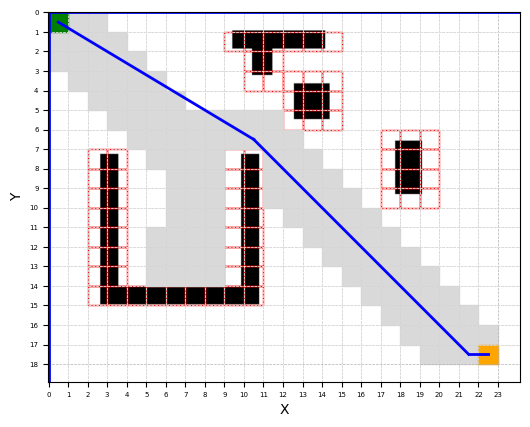

In [9]:
map.draw_path_found(simplified_path, initial, goal, explorer.get_reached())

**Genetic algorithm**

Finish Ant colony optimization, size of initial population:  5
------------Generation 1 -----------------
Before selection, population size:  5
After selection, population size:  5
Before crossover, two first parents: 
[0, 1, 25, 49, 71, 95, 117, 94, 70, 48, 72, 96, 120, 144, 122, 100, 77, 101, 125, 126, 149, 150, 174, 198, 222, 246, 270, 247, 271, 294, 318, 342, 366, 390, 413]
[0, 1, 25, 24, 46, 69, 70, 71, 94, 72, 73, 97, 121, 98, 76, 54, 78, 102, 126, 148, 125, 149, 173, 196, 220, 243, 219, 242, 264, 288, 312, 290, 268, 246, 269, 270, 294, 318, 340, 364, 388, 412, 413]
After crossover, two first parents: 
[0, 1, 25, 49, 71, 95, 117, 94, 70, 48, 72, 73, 97, 121, 98, 76, 54, 78, 102, 126, 148, 125, 149, 173, 196, 220, 243, 219, 242, 264, 288, 312, 290, 268, 246, 269, 270, 294, 318, 340, 364, 388, 412, 413]
[0, 1, 25, 24, 46, 69, 70, 71, 94, 72, 96, 120, 144, 122, 100, 77, 101, 125, 126, 149, 150, 174, 198, 222, 246, 270, 247, 271, 294, 318, 342, 366, 390, 413]
Before mutation: [0, 1, 

/Users/haily/Documents/GitHub/mobile_robot_path_planning/genetic/cal_smooth_value.py:12: RuntimeWarning: invalid value encountered in scalar divide
  cosine_theta = dot_product / (norm_AB * norm_BC)


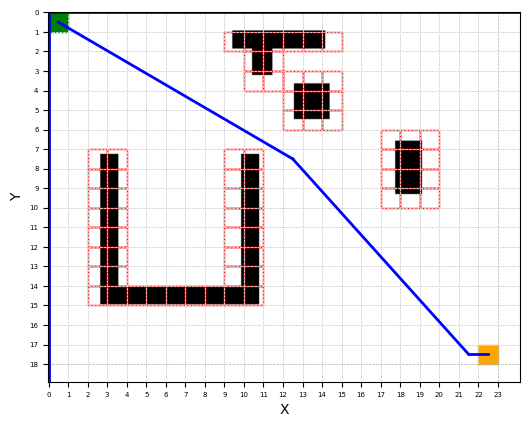

In [10]:
from genetic.genetic import genetic

path = genetic(map, start=initial, end=goal,
                max_generation=2, initial_population_size=1, 
                p_crossover=1, p_mutation=0.05, verbose=True)

map.draw_path_found(path, initial, goal, [])